In [48]:
!pip install requests beautifulsoup4


In [66]:
import requests

def coletar_noticias():
    # Substitua 'sua_api_key' pela chave de API válida do NewsAPI
    api_key = 'a3a777c28da94ddfbd45873df3649541'
    query = 'bolos e tortas'

    url = f'https://newsapi.org/v2/everything?q={query}&apiKey={api_key}'

    try:
        response = requests.get(url)
        response.raise_for_status()

        noticias = response.json()['articles']

        return noticias

    except Exception as e:
        print(f"Ocorreu um erro ao coletar notícias: {str(e)}")
        return []

if __name__ == "__main__":
    noticias_coletadas = coletar_noticias()

    if noticias_coletadas:
        for idx, noticia in enumerate(noticias_coletadas, start=1):
            print(f"Notícia {idx}:")
            print(f"Título: {noticia['title']}")
            print(f"Fonte: {noticia['source']['name']}")
            print(f"URL: {noticia['url']}")
            print("\n")
    else:
        print("Nenhuma notícia relacionada a bolos e tortas foi encontrada.")


Notícia 1:
Título: Entrevista: pesquisa indica que 99% dos ultraprocessados são nocivos à saúde
Fonte: Olhardigital.com.br
URL: https://olhardigital.com.br/2023/09/05/videos/entrevista-pesquisa-indica-que-99-dos-ultraprocessados-sao-nocivos-a-saude/


Notícia 2:
Título: Brigadeiro com pistache: seu sabor favorito na sobremesa fácil
Fonte: Terra.com.br
URL: https://www.terra.com.br/vida-e-estilo/degusta/receitas/brigadeiro-com-pistache-seu-sabor-favorito-na-sobremesa-facil,d69ac1da68b8a1678a5d40060a09efc27yky0doq.html


Notícia 3:
Título: Quase 99% dos ultraprocessados são nocivos à saúde, aponta estudo
Fonte: Olhardigital.com.br
URL: https://olhardigital.com.br/2023/09/04/medicina-e-saude/quase-99-dos-ultraprocessados-sao-nocivos-a-saude-aponta-estudo/


Notícia 4:
Título: [Removed]
Fonte: [Removed]
URL: https://removed.com


Notícia 5:
Título: Vantagens e desvantagens do trabalho autônomo
Fonte: Dinheirama.com
URL: https://dinheirama.com/vantagens-e-desvantagens-do-trabalho-autonomo/


In [69]:
import pandas as pd

# Função para analisar sentimentos com o TextBlob
def analisar_sentimentos(texto):
    analysis = TextBlob(texto)
    return analysis.sentiment.polarity  # Retorna a polaridade do sentimento

# Função para classificar categorias
def classificar_categoria(titulo):
    if 'bolo' in titulo.lower():
        return 'Receita de Bolo'
    elif 'torta' in titulo.lower():
        return 'Receita de Torta'
    else:
        return 'Outras Notícias de Culinária'

if __name__ == "__main__":
    noticias_coletadas = coletar_noticias()

    if noticias_coletadas:
        noticias_analisadas = []

        for noticia in noticias_coletadas:
            titulo = noticia['title']
            descricao = noticia['description']
            conteudo = noticia['content']

            # Análise de Sentimentos
            polaridade = analisar_sentimentos(f"{titulo} {descricao} {conteudo}")

            # Classificação de Categorias
            categoria = classificar_categoria(titulo)

            noticia_analisada = {
                'Título': titulo,
                'Descrição': descricao,
                'Conteúdo': conteudo,
                'Polaridade de Sentimento': polaridade,
                'Categoria': categoria
            }
            noticias_analisadas.append(noticia_analisada)

        # Carga dos Dados
        df = pd.DataFrame(noticias_analisadas)
        df.to_csv('noticias_analisadas.csv', index=False)

        print("Notícias coletadas, analisadas e salvas em 'noticias_analisadas.csv'.")
    else:
        print("Nenhuma notícia relacionada a bolos e tortas foi encontrada.")

Notícias coletadas, analisadas e salvas em 'noticias_analisadas.csv'.


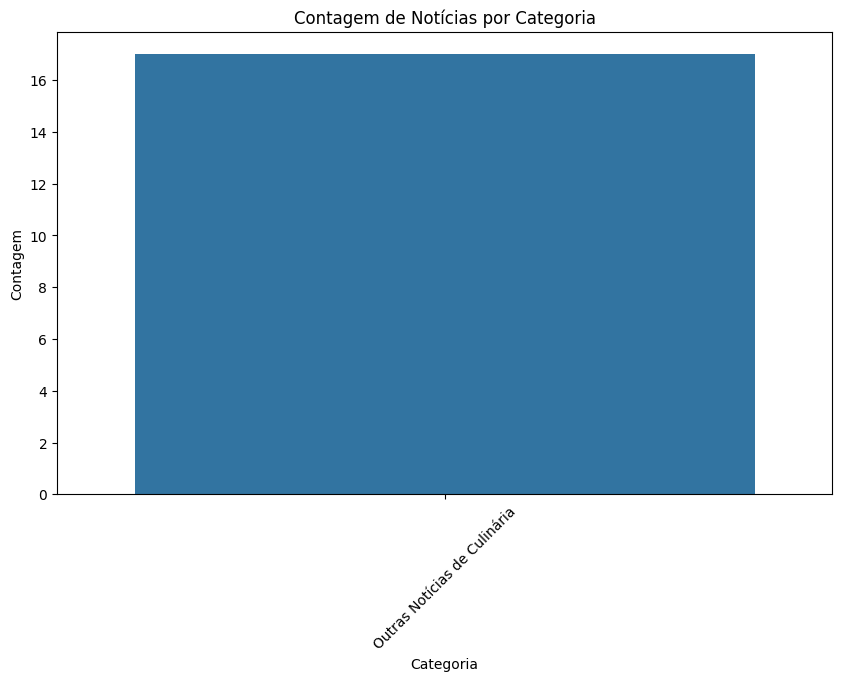

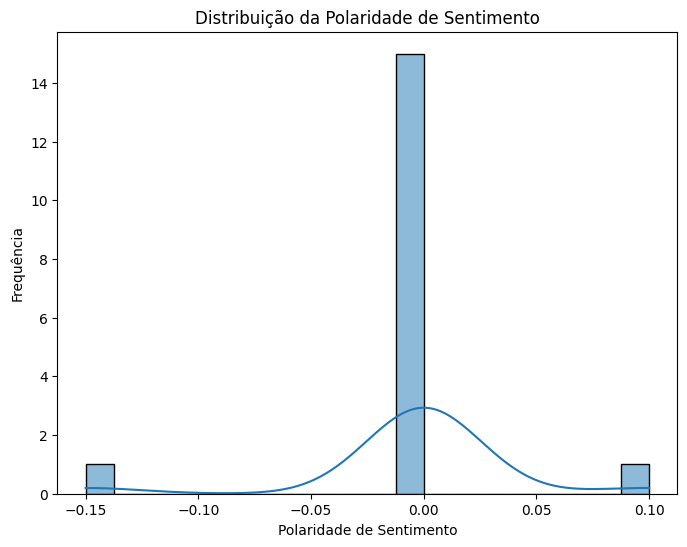


Relatório de Notícias Coletadas:

- Total de Notícias: 17
- Média de Polaridade de Sentimento: -0.00
- Categorias de Notícias:
Outras Notícias de Culinária    17

Mantenha seu projeto atualizado e continue explorando e visualizando os dados de acordo com suas necessidades.



In [70]:

import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o arquivo CSV com as notícias
df = pd.read_csv('noticias_analisadas.csv')

# Análise de Dados Simples
total_noticias = len(df)
categorias_count = df['Categoria'].value_counts()
polaridade_media = df['Polaridade de Sentimento'].mean()

# Visualização de Dados
plt.figure(figsize=(10, 6))

# Gráfico de Barras das Categorias
sns.barplot(x=categorias_count.index, y=categorias_count.values)
plt.title('Contagem de Notícias por Categoria')
plt.xticks(rotation=45)
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

# Histograma da Polaridade de Sentimento
plt.figure(figsize=(8, 6))
sns.histplot(df['Polaridade de Sentimento'], bins=20, kde=True)
plt.title('Distribuição da Polaridade de Sentimento')
plt.xlabel('Polaridade de Sentimento')
plt.ylabel('Frequência')
plt.show()

# Geração de Relatório Simples
relatorio = f"""
Relatório de Notícias Coletadas:

- Total de Notícias: {total_noticias}
- Média de Polaridade de Sentimento: {polaridade_media:.2f}
- Categorias de Notícias:
{categorias_count.to_string()}

Mantenha seu projeto atualizado e continue explorando e visualizando os dados de acordo com suas necessidades.
"""
print(relatorio)

# Salvar o Relatório em um Arquivo
with open('relatorio_noticias.txt', 'w') as arquivo:
    arquivo.write(relatorio)


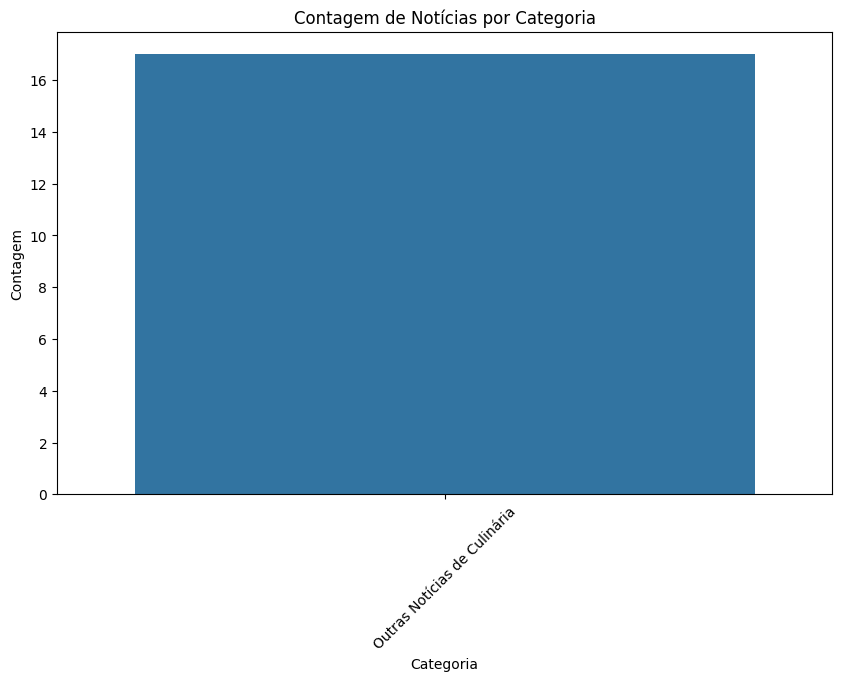

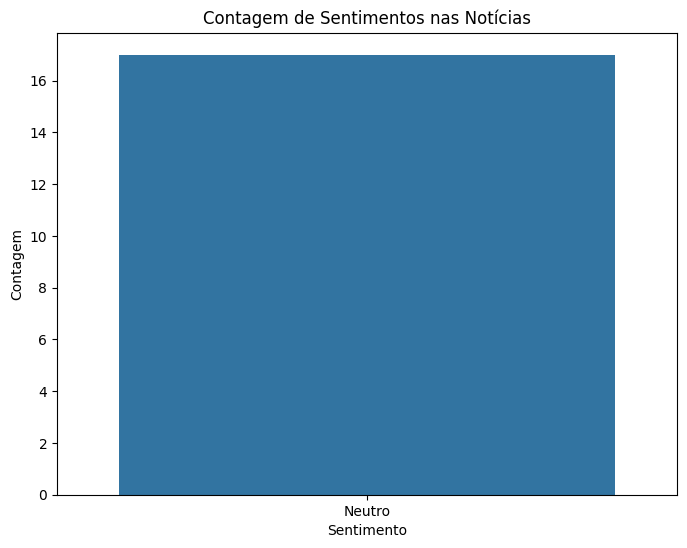


Relatório de Notícias Coletadas:

- Total de Notícias: 17
- Categorias de Notícias:
Outras Notícias de Culinária    17
- Distribuição de Sentimentos:
Neutro    17

Mantenha seu projeto atualizado e continue explorando e visualizando os dados de acordo com suas necessidades.



In [74]:
from textblob import TextBlob


# Carregando o arquivo CSV com as notícias
df = pd.read_csv('noticias_analisadas.csv')

# Verificação da existência de uma coluna com texto
coluna_texto = None
colunas = df.columns
for coluna in colunas:
    if df[coluna].dtype == 'object':
        coluna_texto = coluna
        break

if coluna_texto is None:
    raise KeyError("Nenhuma coluna de texto foi encontrada no DataFrame.")

# Limpeza de Texto
df['Texto Limpo'] = df[coluna_texto].apply(lambda x: " ".join(x.lower() for x in x.split()))  # Conversão para minúsculas


# Função para Análise de Sentimentos
def analisar_sentimento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity < 0:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplicar Análise de Sentimentos
df['Sentimento'] = df['Texto Limpo'].apply(analisar_sentimento)

# Análise de Dados
total_noticias = len(df)
categorias_count = df['Categoria'].value_counts()
sentimentos_count = df['Sentimento'].value_counts()

# Visualização de Dados
plt.figure(figsize=(10, 6))

# Gráfico de Barras das Categorias
sns.barplot(x=categorias_count.index, y=categorias_count.values)
plt.title('Contagem de Notícias por Categoria')
plt.xticks(rotation=45)
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

# Gráfico de Barras dos Sentimentos
plt.figure(figsize=(8, 6))
sns.barplot(x=sentimentos_count.index, y=sentimentos_count.values)
plt.title('Contagem de Sentimentos nas Notícias')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

# Geração de Relatório
relatorio = f"""
Relatório de Notícias Coletadas:

- Total de Notícias: {total_noticias}
- Categorias de Notícias:
{categorias_count.to_string()}
- Distribuição de Sentimentos:
{sentimentos_count.to_string()}

Mantenha seu projeto atualizado e continue explorando e visualizando os dados de acordo com suas necessidades.
"""
print(relatorio)

# Salvar o Relatório em um Arquivo
with open('relatorio_noticias.txt', 'w') as arquivo:
    arquivo.write(relatorio)
